# Homework 0

## Action Castle

For the first homework, we'll implement a more complicated game based on __Action Castle__, a game in the awesome book
[Parsley](http://www.memento-mori.com/parsely-products/parsely-pdf)  by Jared A. Sorensen.

Here's a map of Action Castle.

![Map of Action Castle](map.png)

### Install required libraries

In [1]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


### Import Text Adventures

In [2]:
from text_adventure_games import (
    games, parsing, actions, things, blocks, viz
)

## Locations

In [3]:

cottage = things.Location(
    "Cottage",
    "You are standing in a small cottage."
)
garden_path = things.Location(
    "Garden Path",
    "You are standing on a lush garden path. There is a cottage here.",
)
fishing_pond = things.Location(
    "Fishing Pond",
    "You are at the edge of a small fishing pond."
)
winding_path = things.Location(
    "Winding Path",
    "You are walking along a winding path. There is a tall tree here.",
)
top_of_tree = things.Location(
    "Top of the Tall Tree",
    "You are the top of the tall tree."
)
drawbridge = things.Location(
    "Drawbridge",
    "You are standing on one side of a drawbridge leading to ACTION CASTLE.",
)
courtyard = things.Location(
    "Courtyard",
    "You are in the courtyard of ACTION CASTLE."
)
tower_stairs = things.Location(
    "Tower Stairs",
    "You are climbing the stairs to the tower. There is a locked door here.",
)
tower = things.Location(
    "Tower",
    "You are inside a tower."
)
dungeon_stairs = things.Location(
    "Dungeon Stairs",
    "You are climbing the stairs down to the dungeon."
)
dungeon = things.Location(
    "Dungeon",
    "You are in the dungeon. There is a spooky ghost here."
)
feasting_hall = things.Location(
    "Great Feasting Hall",
    "You stand inside the Great Feasting Hall."
)
throne_room = things.Location(
    "Throne Room",
    "This is the throne room of ACTION CASTLE."
)
death = things.Location(
    "The Afterlife",
    "You are dead. GAME OVER."
)
death.set_property("game_over", True)


# Map of Locations
cottage.add_connection("out", garden_path)
garden_path.add_connection("south", fishing_pond)
garden_path.add_connection("north", winding_path)
winding_path.add_connection("up", top_of_tree)
winding_path.add_connection("east", drawbridge)
top_of_tree.add_connection("jump", death)
drawbridge.add_connection("east", courtyard)
courtyard.add_connection("up", tower_stairs)
courtyard.add_connection("down", dungeon_stairs)
courtyard.add_connection("east", feasting_hall)
tower_stairs.add_connection("up", tower)
dungeon_stairs.add_connection("down", dungeon)
feasting_hall.add_connection("east", throne_room)



###  Preliminary Game Map

Here is a visualization of the locations in action castle represented as a directed graph.

![Visualization of game map starting from the tower](../map-from-tower.svg)

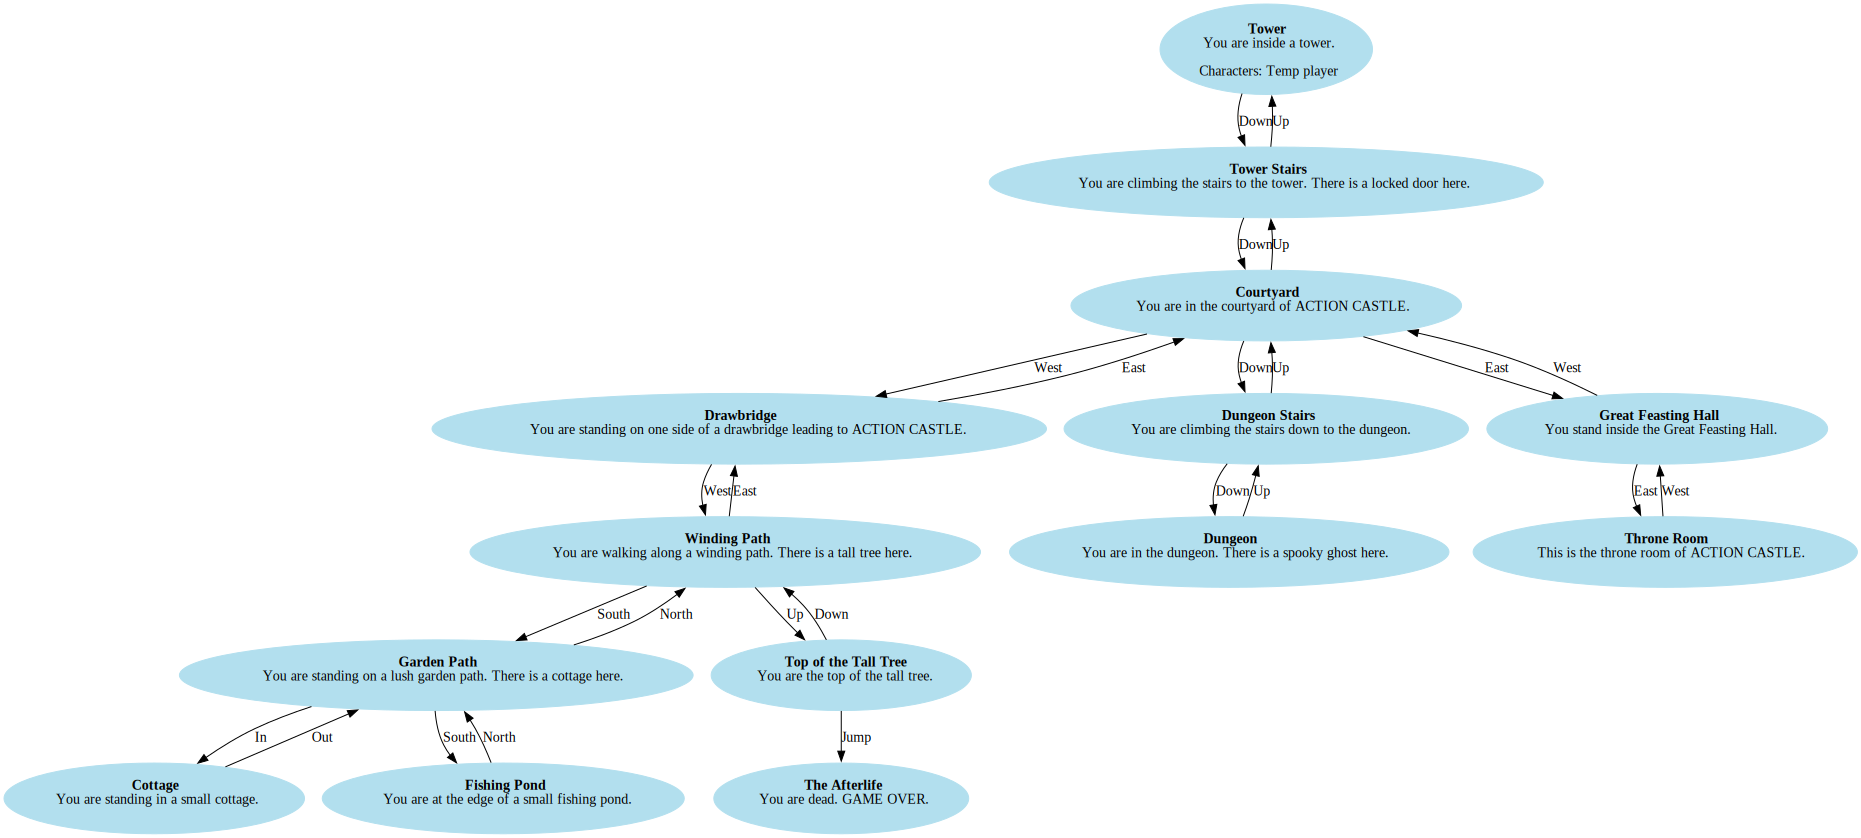

In [4]:
tempgame = games.Game(tower, things.Character(name="Temp Player", description="", persona=""))

from text_adventure_games.viz import Visualizer # Imports the Visualizer class
viz = Visualizer(tempgame) # Makes a visualization object from the game state
graph = viz.visualize() # makes and stores a graph
graph # Writing this at the end of a cell in jupyter notebook displays the variable's value 

## Items

### Gettable Items

In [5]:
# Put a fishing pole at the cottage
fishing_pole = things.Item(
    "pole",
    "a fishing pole",
    "A SIMPLE FISHING POLE.",
)
cottage.add_item(fishing_pole)


# Put a branch in a tree that could be used as a weapon
branch = things.Item(
    "branch",
    "a stout, dead branch",
    "IT LOOKS LIKE IT WOULD MAKE A GOOD CLUB.",
)
branch.set_property("is_weapon", True)
branch.set_property("is_fragile", True)
top_of_tree.add_item(branch)


# Put a candle in the feasting hall
candle = things.Item(
    "candle",
    "a strange candle",
    "THE CANDLE IS COVERED IN STARGE RUNES.",
)
candle.set_property("is_lightable", True)
candle.set_property("is_lit", False)
candle.add_command_hint("light candle")
candle.add_command_hint("read runes")
feasting_hall.add_item(candle)


### Scenery Items

_We called these "non-gettable" in the tutorial_

In [6]:
# Put an actual pond at the fishing location
pond = things.Item(
    "pond",
    "a small fishing pond",
    "THERE ARE FISH IN THE POND.",
)
pond.set_property("gettable", False)
pond.set_property("has_fish", True)
pond.add_command_hint("catch fish")
pond.add_command_hint("catch fish with pole")
fishing_pond.add_item(pond)


# A nice rosebush for the garden path
rosebush = things.Item(
    "rosebush",
    "a rosebush",
    "THE ROSEBUSH CONTAINS A SINGLE RED ROSE.  IT IS BEAUTIFUL.",
)
rosebush.set_property("gettable", False)
rosebush.set_property("has_rose", True)
rosebush.add_command_hint("pick rose")
garden_path.add_item(rosebush)


# Throne room wouldn't be that impressive without a throne
throne = things.Item(
    "throne",
    "An ornate golden throne."
)
throne.set_property("gettable", False)
throne.add_command_hint("sit on throne")
throne_room.add_item(throne)


# A door that leads to the tower stairs
door = things.Item(
    "door",
    "a door",
    "THE DOOR IS SECURELY LOCKED."
)
door.set_property("gettable", False)
door.set_property("is_locked", True)
door.add_command_hint("unlock door")
tower_stairs.add_item(door)


## Characters

### Player

In [7]:
# Player
player = things.Character(
    name="The player",
    description="You are a simple peasant destined for greatness.",
    persona="I am on an adventure.",
)

# Player's lamp
lamp = things.Item("lamp", "a lamp", "A LAMP.")
lamp.set_property("is_lightable", True)
lamp.set_property("is_lit", False)
lamp.add_command_hint("light lamp")
player.add_to_inventory(lamp)


### Non-Player Characters (NPCs)

In [8]:
# A Troll at the drawbridge
troll = things.Character(
    name="troll",
    description="A mean troll",
    persona="I am hungry. The guard promised to feed me if I guard the drawbridge and keep people out of the castle.",
)
troll.set_property("is_hungry", True)
troll.set_property("character_type", "troll")
drawbridge.add_character(troll)


# A guard in the courtyard
guard = things.Character(
    name="guard",
    description="A castle guard",
    persona="I am suspicious of anyone trying to enter the castle. I will prevent keep people from entering and learning the castle's dark secrets.",
)
guard.set_property("is_conscious", True)
guard.set_property("is_suspicious", True)
guard.set_property("character_type", "human")
courtyard.add_character(guard)

# Guard has a key
key = things.Item("key", "a brass key", "THIS LOOKS USEFUL")
guard.add_to_inventory(key)

# Guard has a sword
sword = things.Item("sword", "a short sword", "A SHARP SHORT SWORD.")
sword.set_property("is_weapon", True)
guard.add_to_inventory(sword)


# A Princess in the tower
princess = things.Character(
    name="princess",
    description="A princess who is beautiful and lonely. She awaits her non-gender-stereotypical soulmate.",
    persona="I am the princess. I am grieving my father's death. I feel alone.",
)
princess.set_property("is_royal", True)
princess.set_property("emotional_state", "sad and lonely")
princess.set_property("is_married", False)
princess.set_property("character_type", "human")
tower.add_character(princess)


# A ghost in the dungeon
ghost = things.Character(
    name="ghost",
    description="A ghost with bony, claw-like fingers and who is wearing a crown.",
    persona="I was murdered by the guard. I will haunt this castle until banished. If you linger before my apparition, I will plunge my ghostly hand inside you and stop your heart",
)
ghost.set_property("character_type", "ghost")
ghost.set_property("is_dead", True)
ghost.set_property("is_banished", False)
dungeon.add_character(ghost)

# Ghost's crown
crown = things.Item("crown", "a crown", "A CROWN FIT FOR A KING.")
crown.add_command_hint("wear crown")
ghost.add_to_inventory(crown)



## Actions

Your job in this homework is to put the action in _Action Castle_! We will implement an action for each of the following:

- Unlock a door
- Read Runes
- Propose
- Wear the crown
- Sit on a throne

In [9]:
class Unlock_Door(actions.Action):
    ACTION_NAME = "unlock door"
    ACTION_DESCRIPTION = "Unlock a door with a key"
    ACTION_ALIASES = []
    
    def __init__(self, game, command):
        super().__init__(game)

        self.character = self.parser.get_character(command) # if there is character in the command then it will return the character otherwise .get_character() returns the player as default
        self.key = self.parser.match_item("key", self.character.inventory) # Key must be in character's inventory, not just in scope
        self.door = self.parser.match_item("door", self.parser.get_items_in_scope(self.character)) # Door must be in-scope(current location or inventory) of character

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * There must be a door
        * The character must be at the same location as the door
        * The door must be locked
        * The character must have the key in their inventory
        """
        
        # Check if door was matched, if not matched was_matched() prints the error message passed in the argument and returns False
        if not self.was_matched(self.door, "I don't see a door here."): 
            return False
        
        # Check if key was matched, if not matched was_matched() prints the error message passed in the argument and returns False
        if not self.was_matched(self.key, "I don't see a key."): # self.was_matched() checks if self.key is None or not(not matched or matched)
            return False
            
        # Key check is redundant since we already searched in inventory
            
        # Check if door is locked, if not locked then return False and print the error message using self.parser.fail()
        if not self.door.get_property("is_locked"):
            self.parser.fail("The door is not locked.")
            return False
        # Otherwise return True after all checks are done    
        return True

    def apply_effects(self):
        """
        Effects:
        * Unlocks the door
        """
        # Unlocks the door and print the success message using self.parser.ok()
        self.door.set_property("is_locked", False)
        self.parser.ok("The door is now unlocked.")

In [10]:
class Read_Runes(actions.Action):
    """
    Reading the runes on the candle with strange runes on it will banish the
    ghost from the dungeon, and cause it to drop the crown.
    """
    ACTION_NAME = "read runes"
    ACTION_DESCRIPTION = "Read runes off of the candle"
    ACTION_ALIASES = []

    def __init__(self, game, command):
        super().__init__(game)
        self.character = self.parser.get_character(command) # if there is character in the command then it will return the character otherwise .get_character() returns the player as default
        
        # Candle must be in character's inventory (they need to have picked it up and lit it)
        self.candle = self.parser.match_item("candle", self.character.inventory)

        # Find the ghost in the current location
        self.ghost = None # Initialize ghost as None
        if self.character and self.character.location: # Check if character and character's location exist
            for char_name, char in self.character.location.characters.items(): # Iterate through characters in the current location
                if char.get_property("character_type") == "ghost": # Check if the character is a ghost
                    self.ghost = char # Update self.ghost to the ghost character
                    break

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * There must be a candle with strange runes on it
        * The character must have the candle in their inventory
        * the ghost must be in this location
        * The candle must be lit
        """
        # Check if candle was matched, if not matched was_matched() prints the error message passed in the argument and returns False
        if not self.was_matched(self.candle, "I don't see a candle here."):
            return False
            
        # Candle check by .is_in_inventory() is redundant since we already searched in inventory using .match_item() in __init__
            
        # Check if ghost is in the location, if not matched was_matched() prints the error message passed in the argument and returns False
        if not self.was_matched(self.ghost, "There is no ghost here."):
            return False
            
        # Check if candle is lit, if not lit then return False and print the error message using self.parser.fail()
        if not self.candle.get_property("is_lit"):
            self.parser.fail("The candle must be lit to read the runes.")
            return False
            
        return True

    def apply_effects(self):
        """
        Effects:
        * Banishes the ghost, causing it to drop its inventory.
        """
        # Banish the ghost
        self.ghost.set_property("is_banished", True)
        
        # Remove ghost from location
        self.character.location.remove_character(self.ghost)
        
        # Drop ghost's inventory
        items = list(self.ghost.inventory.keys())
        for item_name in items: # For each item in the ghost's inventory
            item = self.ghost.inventory[item_name] # Get the item object from the ghost's inventory
            self.ghost.remove_from_inventory(item) # Remove the item from the ghost's inventory
            item.location = self.character.location # Set the item's location to the character's location
            self.character.location.add_item(item) # Also Add the item to the character's location
        
        # Print the success message using self.parser.ok()
        self.parser.ok("The runes glow with an eerie light. The ghost shrieks and vanishes, dropping its crown!")


In [11]:
class Propose(actions.Action):
    """
    Mawwige is whut bwings us togevveh today. 
    """
    ACTION_NAME = "propose marriage"
    ACTION_DESCRIPTION = "Propose marriage to someone"
    ACTION_ALIASES = []


    def __init__(self, game, command):
        super().__init__(game)
        # Parse the command to find proposer and propositioned
        propose_words = ["propose", "propose marriage"]
        command_before_word = "" # Initialize command_before_word as an empty string
        command_after_word = command # If the word is not found in the command, then command_after_word will be the same as command
        # For any of the words in propose_words
        for word in propose_words:
            if word in command: # If the word is in the command
                parts = command.split(word, 1) # .split() splits the string at the the first and only occurence of the word(because of 1 in second argument sets a max limit at number of splits) and returns a list of the parts
                command_before_word = parts[0] # Store the part before the word in command_before_word
                command_after_word = parts[1] # Store the part after the word in command_after_word
                break
        
        self.proposer = self.parser.get_character(command_before_word) # Get the character object from the command_before_word, will be the player if the word is not found in the command and command_before_word=""
        self.propositioned = self.parser.get_character(command_after_word) # Get the character object from the command_after_word, will be the character that appears first in the command in case word is not found and player if no character is found in the command

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * The two characters must be in the same place
        * Neither can be married yet
        * Both must be happy
        """
        
        # Check if they are the same person(The player could be both proposer and propositioned because of the way __init__ is implemented), if yes then return False and print the error message using self.parser.fail()
        if self.proposer == self.propositioned:
            self.parser.fail("You can't propose to yourself!")
            return False
            
        # Check if they are in the same location, if not then return False and print the error message using self.parser.fail()
        if not self.proposer.location.here(self.propositioned):
            self.parser.fail("The two characters must be in the same location.")
            return False
            
        # Check if proposer is already married, if yes then return False and print the error message using self.parser.fail()
        if self.proposer.get_property("is_married"):
            self.parser.fail("The proposer is already married.")
            return False
            
        # Check if propositioned is already married, if yes then return False and print the error message using self.parser.fail()
        if self.propositioned.get_property("is_married"):
            self.parser.fail("The person you want to propose to is already married.")
            return False
            
        # Check if both are happy (not "sad and lonely")
        if self.proposer.get_property("emotional_state") == "sad and lonely":
            self.parser.fail("The proposer is too sad to propose.")
            return False
        
        if self.propositioned.get_property("emotional_state") == "sad and lonely": # The princess is too sad to accept, give a hint to the player to make her happy  
            self.parser.fail("The person you want to propose to is too sad to accept. Maybe a rose will cheer her up.")
            return False
            
        return True

    def apply_effects(self):
        """
        Effects:
        * They said "Yes!"
        * They are married.
        * If one is a royal, they are now both royals
        """
        # Set both as married
        self.proposer.set_property("is_married", True)
        self.propositioned.set_property("is_married", True)
        
        # If one is royal, make both royal
        if self.proposer.get_property("is_royal") or self.propositioned.get_property("is_royal"):
            self.proposer.set_property("is_royal", True)
            self.propositioned.set_property("is_royal", True)
        
        self.parser.ok(f"{self.propositioned.name} said 'Yes!' {self.proposer.name} and {self.propositioned.name} are now married!")


In [12]:
# By the flow described in the Skeleton Code, the player doesn't need to wear a crown to sit on the throne and win the game, it is just an extra step that they take look cool I guess

class Wear_Crown(actions.Action):
    ACTION_NAME = "wear crown"
    ACTION_DESCRIPTION = "Put a crown in your inventory atop your head"
    ACTION_ALIASES = []
    
    def __init__(self, game, command):
        super().__init__(game)
        # Anupreet Singh, anupreet2226579@gmail.com
        self.character = self.parser.get_character(command)
        # Crown must be in character's inventory (they need to have picked it up)
        self.crown = self.parser.match_item("crown", self.character.inventory) # match_item() returns the item object if the item name is found in the character's inventory otherwise it returns None

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * The crown must be in the character's inventory
        * The the character must be a royal
        """
        # Check if crown was matched/Crown is in character's inventory, if not matched self.crown will be None and self.was_matched() will return False and print the error message passed in the argument
        if not self.was_matched(self.crown, "I don't see a crown here."):
            return False
        # Crown check by .is_in_inventory() is redundant since we already searched in inventory using .match_item() in __init__
            
        # Check if character is royal, if not then return False and print the error message using self.parser.fail()
        if not self.character.get_property("is_royal"):
            self.parser.fail("Only royalty can wear a crown.")
            return False
            
        return True

    def apply_effects(self):
        """
        The character is crowned.
        """
        # Set the character as crowned
        self.character.set_property("is_crowned", True)

        # Print the success message using self.parser.ok()
        self.parser.ok(f"{self.character.name} wears the crown and is now the rightful ruler!")



In [13]:
class Sit_On_Throne(actions.Action):
    ACTION_NAME = "sit on throne"
    ACTION_DESCRIPTION = "Sit on the throne, if you are royalty"
    ACTION_ALIASES = []
    
    def __init__(self, game, command):
        super().__init__(game)
        # Anupreet Singh, anupreet2226579@gmail.com
        self.character = self.parser.get_character(command) # get_character() returns the character object if the character name is command in the game otherwise it returns the player as default
        self.throne = self.parser.match_item("throne", self.parser.get_items_in_scope(self.character)) # if there is a throne in the scope of the character then it will return the throne object otherwise it will return None

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * The character must be in same location as the throne
        * The the character must be a royal
        """
        # Check if throne was matched/ Throne is in the same location as the character
        if not self.was_matched(self.throne, "I don't see a throne here."):
            return False
            
        # Check if character is royal, if not then return False and print the error message using self.parser.fail()
        if not self.character.get_property("is_royal"):
            self.parser.fail("Only royalty can sit on the throne.")
            return False
            
        return True

    def apply_effects(self):
        """
        The character is crowned.
        """
        # Set the character as reigning
        self.character.set_property("is_reigning", True) # This is the property that is checked to see if the game is won
        self.character.set_property("is_sitting_on_throne", True) 
        
        self.parser.ok(f"{self.character.name} sits on the throne and becomes the reigning monarch of ACTION CASTLE!")


## Blocks

In text adventure games, _blocks_ are essentially puzzles to unlock the next stage in the game.  
**Blocks are usually called when players want to move using the Go class from actions/location. If that locations has a block instance added to it then it executes the self.isblocked() to see if the that block is still True or False**

We give you a `Troll_Block` for an example of what an implementation looks like.

You should implement:
* The guard block (similar to the troll block)
* The darkness block (unblocked if any character at the location is carrying
  a lit item (like a lamp or candle)
* A locked door block

In [14]:
# Sample Block

class Troll_Block(blocks.Block):
    """
    Blocks progress in this direction until the troll is no longer hungry, or
    leaves, or is unconscious, or dead.
    """

    def __init__(self, location: things.Location, troll: things.Character):
        super().__init__("A troll blocks your way", "A hungry troll blocks your way") # send in name, description of the block
        self.location = location
        self.troll = troll

    def is_blocked(self) -> bool:
        # Conditions of block:
        # * There is a troll here
        # * The troll is alive and conscious
        # * The troll is still hungry
        if self.troll:
            if not self.location.here(self.troll):
                return False
            if self.troll.get_property("is_dead"):
                return False
            if self.troll.get_property("is_unconscious"):
                return False
            if self.troll.get_property("is_hungry"):
                return True
        return False


In [15]:
class Guard_Block(blocks.Block):
    """
    Blocks progress in this direction until the guard is no longer suspicious, or
    leaves, or is unconscious, or dead.
    """

    def __init__(self, location: things.Location, guard: things.Character):
        super().__init__("A guard blocks your way", "The guard refuses to let you pass.") # send in name, description of the block in the construcutor of parent/super class
        self.location = location # set value of instance attribute "self.location" for this instance of class Guard_Block
        self.guard = guard # set value of instance attribute "self.guard" for this instance of class Guard_Block

    def is_blocked(self) -> bool:
        # Conditions of block:
        # * There is a guard here
        # * The guard is alive and conscious
        # * The guard is suspicious
        if self.guard: # If guard is not None
            if not self.location.here(self.guard): # If guard is not in the same location 
                return False # Block is not active
            if self.guard.get_property("is_dead"): # If guard is dead
                return False # Block is not active
            if self.guard.get_property("is_unconscious"): # If guard is unconscious 
                return False # Block is not active
            if self.guard.get_property("is_suspicious"): # If guard is suspicious
                return True # Block is active
        return False

In [16]:
class Darkness(blocks.Block):
    """
    Blocks progress in this direction unless the character has something that lights the way.
    """

    def __init__(self, location: things.Location):
        super().__init__("Darkness blocks your way", "It's too dark to go that way.")
        self.location = location

    def is_blocked(self) -> bool:
        # Conditions of block:
        # * The location is dark
        # * Unblocked if any character at the location is carrying a lit item 
        #   (like a lamp or candle)
        
        # For all characters in the location
        for char_name, character in self.location.characters.items():
            # For all items in a character's inventory
            for item_name, item in character.inventory.items():
                # Check if item is lit
                if item.get_property("is_lit"):
                    return False  # Unblocked if any character has a lit item
        
        return True  # Blocked if no lit items found

In [17]:
class Door_Block(blocks.Block):
    """
    Blocks progress in this direction until the character unlocks the door.
    """

    def __init__(self, location: things.Location, door: things.Item):
        super().__init__("A locked door blocks your way", "The door ahead is locked.")
        self.location = location
        self.door = door

    def is_blocked(self) -> bool:
        # Conditions of block:
        # * The door is locked
        
        # If door is there and is locked then return True
        if self.door and self.door.get_property("is_locked"):
            return True
        return False

In [ ]:
# Creating Instance of the Block classes and then adding them to the locations

# Added blocks to location to:
# * the courtyard - the guard prevents you from going East
# * the dungeon_stairs - the darkness prevents you from going Down
# * the tower stairs - the locked door prevents you from going Up

troll_block = Troll_Block(drawbridge, troll)
drawbridge.add_block("east", troll_block)

# Add guard block to courtyard (prevents going East to feasting hall)
guard_block = Guard_Block(courtyard, guard)
courtyard.add_block("east", guard_block)

# Add darkness block to dungeon stairs (prevents going Down to dungeon)
darkness_block = Darkness(dungeon_stairs)
dungeon_stairs.add_block("down", darkness_block)

# Add door block to tower stairs (prevents going Up to tower)
door_block = Door_Block(tower_stairs, door)
tower_stairs.add_block("up", door_block)


## Play Action Castle

In [19]:
# Defines a custom game class "ActionCastle" that inherits from the "Game" class.
class ActionCastle(games.Game):
    def __init__(self, start_at: things.Location, player: things.Character, characters=None, custom_actions=None):
        super().__init__(start_at, player, characters=characters, custom_actions=custom_actions) # Calls the constructor of the super class

    # Adds a custom method to check win condition for the specific to ActionCastle class
    def is_won(self) -> bool:
        """ 
        Checks whether the game has been won. For Action Castle, the game is won
        once any character is sitting on the throne (has the property is_reigning set to True).
        """
        for name, character in self.characters.items():
            if character.get_property("is_reigning"):
                msg = "{name} is now reigns in ACTION CASTLE! {name} has won the game!"
                self.parser.ok(msg.format(name=character.name.title()), self)
                return True
        return False

In [20]:
characters = [troll, guard, princess, ghost]
# Import rose actions and give action, essential for making the princess happy 
from text_adventure_games.actions.rose import Pick_Rose, Smell_Rose
from text_adventure_games.actions.things import Give
custom_actions = [Unlock_Door, Read_Runes, Propose, Wear_Crown, Sit_On_Throne, Pick_Rose, Smell_Rose, Give]

# Making an instance of the ActionCastle class
game = ActionCastle(cottage, player, characters=characters, custom_actions=custom_actions)


In [21]:
game.game_loop()

You are standing in a small cottage.
Exits:
Out to Garden Path

You see:
 * a fishing pole


You are standing on a lush garden path. There is a cottage here.
Exits:
In to Cottage
South to Fishing Pond
North to Winding Path

You see:
 * a rosebush
        pick rose


The player picked the lone rose from the rosebush
The player smells the rose. It smells sunny and cheerful.
The player is happy.
You are standing on a lush garden path. There is a cottage here.
Exits:
In to Cottage
South to Fishing Pond
North to Winding Path

You see:
 * a rosebush
        pick rose


You are walking along a winding path. There is a tall tree here.
Exits:
South to Garden Path
Up to Top of the Tall Tree
East to Drawbridge




You are standing on one side of a drawbridge leading to ACTION CASTLE.
Exits:
West to Winding Path
East to Courtyard


Characters:
 * A mean troll

A hungry troll blocks your way
A hungry troll blocks your way
You are walking along a winding path. There is a tall tree here.
Exits:
South

TypeError: Parser.ok() takes 2 positional arguments but 3 were given

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b16fb3c8-85ab-4463-b29e-8658c8738191' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>